

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>






<div class="alert alert-info">
<strong>Comentário do estudante</strong>
Muito obrigado Rafael pelo tempo tomado para corrigir meu projeot, realizei as modificações conforme sugerido, agreido que elas trouxeram uma melhor visibilidade para os meus resultados.
</div>

# Sprint 12 - Descrição do projeto

A rede de academias Model Fitness está desenvolvendo uma estratégia de interação com o cliente baseados em dados analíticos.

Um dos problemas mais comuns que academias e outros serviços enfrentam é a rotatividade de clientes. Como você sabe se um cliente não está mais com você? Você pode calcular a rotatividade baseado nas pessoas que se livram das suas contas ou não renovam seus contratos. No entanto, às vezes não é óbvio que um cliente saiu: eles podem sair de fininho.
Indicadores de rotatividade varia de área para área. Se um usuário compra de uma loja online raramente mas regularmente, você não pode dizer que é um fujão. Mas se por duas semanas eles não abriam o canal que é atualizado diariamente, essa é uma razão para se preocupar: seu seguidor pode ter ficado aborrecido e deixado você.

Para uma academia, faz sentido dizer que os clientes saíram se eles não aparecem há um mês. É claro, é possível que eles estejam em Cancun e virão tornar a frequentar quando retornarem, mas esse não é um caso comum. Normalmente, se um cliente ingressa, vem algumas vezes, depois desaparece, ele provavelmente não voltará.

Em vez de lutar com a rotatividade, Model Fitness digitalizou uma parte dos perfis dos clientes. Sua tarefa é analisá-los e vir com uma estratégia de retenção de clientes.
Você deve:
- Aprender a predizer a probabilidade de rotatividade (para o mês seguinte) para cada cliente
- Elabore retratos de usuários típicos: selecione os grupos mais marcantes e descreva suas principais características
- Analise os fatores que mais impactam a rotatividade
- Tire conclusões básicas e desenvolva recomendações sobre como melhorar o serviço de clientes:
    - Identifique grupos alvo
    - Sugira medidas para diminuir a rotatividade
    - Descreva qualquer outro padrão que você vir com respeito às interações com clientes

## Sobre os dados
   - 'Churn' — a rotatividade do mês em questão
   - Campos de dados atuais:
   - 'gender'
   - 'Near_Location' — se o cliente morar ou trabalhar na vizinhança onde a academia está localizada
   - 'Partner' — se o usuário for um funcionário de uma companhia parceira (a academia tem empresas parceiras cujos funcionários conseguem descontos; nesses casos, a academia armazena informações sobre clientes de são funcionários)
   - Promo_friends — se o cliente originalmente se inscreveu através de uma oferta "traga um amigo" eles normalmente usam o código de promoção do amigo quando pagam pela primeira filiação)
   - 'Phone' — se o usuário fornece o seu número de telefone
   - 'age' (idade)
   - 'Lifetime' — o tempo (em meses) desde a primeira vez que o cliente veio à academia
   - 'Contract_period' — 1 mês, 3 meses, 6 meses, ou um ano
   - 'Month_to_end_contract' — os meses remanescentes até que o contrato expira
   - 'Group_visits' — se o cliente participa de sessões em grupo
   - 'Avg_class_frequency_total' — frequência média de idas por semana por toda a vida do cliente
   - 'Avg_class_frequency_current_month' — frequência média de visitas por semana durante o mês corrente
   - 'Avg_additional_charges_total' — a quantidade total de dinheiro gasto em outros serviços da academia: café, artigos esportivos, cosméticos, massagem, etc.


## Step 1 - Download e carregamento dos dados

- Importar as bibliotecas necessárias

In [1]:
import pandas as pd #manipulação de dados
import seaborn as sns #plotagem
import matplotlib.pyplot as plt #gráficos
##bibliotecas para aprendizado de maquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

In [3]:
#loading the dataset
gym_churn = pd.read_csv('dataset_12/gym_churn_us.csv')


## Step 2 - Realize análise exploratória dos dados (AED)

#### 2.1 Informações sobre o conjunto de dados

In [4]:
#formato e as 3 primeiras linhas
print(gym_churn.shape)
print()
print(gym_churn.head(3))

(4000, 14)

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   

   Churn  
0      0  
1      0  
2      0  


In [5]:
print(gym_churn['Churn'].value_counts())

Churn
0    2939
1    1061
Name: count, dtype: int64


In [6]:
#informações sobre o conjunto de dados
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
print(gym_churn.describe())

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

Conclusão
- O conjunto de dados tem 4000 entradas e 14 colunas, nenhuma das quais tem valores nulos.
- Poderia alterar as colunas para que todas estivessem em minúsculas e seria mais fácil trabalhar mais tarde

In [8]:
#transformar as colunas para letra minuscula

new_col_names = []

for old_name in gym_churn.columns:
    name_lowered = old_name.lower()
    new_col_names.append(name_lowered)

#substituir os nomes antigos pelos novos
    
gym_churn.columns = new_col_names

In [9]:
#filtragem dos dados para os clientes que se desvincularam ou não
not_churned = gym_churn[gym_churn['churn']==0].drop('churn', axis=1)
churned = gym_churn[gym_churn['churn']==1].drop('churn', axis=1)

In [10]:
##describing the data from the clients that did not churndescrevendo os dados dos clientes que não se desvincularam
print(not_churned.describe())

            gender  near_location      partner  promo_friends        phone  \
count  2939.000000    2939.000000  2939.000000    2939.000000  2939.000000   
mean      0.510037       0.873086     0.534195       0.353522     0.903709   
std       0.499984       0.332933     0.498914       0.478144     0.295040   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     1.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      2939.000000   2939.000000  2939.000000   
mean          5.747193      0.464103    29.976523   
std           4.716942      0.498795     3.009933   
min           1.000000      0.000000    19.000000   
25%           1.000000      0.00

In [11]:
#descrevendo os dados dos clientes que se desvincularam
print(churned.describe())

            gender  near_location      partner  promo_friends        phone  \
count  1061.000000    1061.000000  1061.000000    1061.000000  1061.000000   
mean      0.510839       0.768143     0.355325       0.183789     0.902922   
std       0.500118       0.422217     0.478837       0.387495     0.296204   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       0.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      1061.000000   1061.000000  1061.000000   
mean          1.728558      0.268615    26.989632   
std           2.132371      0.443448     2.895163   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

- Diferenças entre os dados dos clientes que não registaram ou registaram rotatividade
    - gender: bem distribuído entre os dois casos.
    - near_location: melhor média para os clientes que não abandonaram a academia, o que significa que vivem mais perto da academia
    - partner: em média, os clientes que se desligaram normalmente não são sócios
    - promo_friends: podemos ver que, em média, temos uma taxa de 0,18 de utilizadores que se inscreveram inicialmente a partir de um código promocional, enquanto os utilizadores que não cancelaram têm uma taxa de 0,35.
    - phone: em ambos os casos, podemos observar uma taxa mais elevada de clientes que forneceram o seu número de telefone ao ginásio
    - contract_period: em média, os clientes que rescindiram têm um período de contrato menor, de 1,72 meses, enquanto os clientes que não rescindiram têm um contrato de 5,74 meses
    - group_visits: os clientes que rescindiram têm uma menor taxa de participação em visitas de grupo (0,26) em comparação com os que não rescindiram (0,46)
    - age: em média, os clientes que rescindiram são mais jovens do que os que não rescindiram
    - avg_additional_charges_total: os clientes que abandonaram a academia gastaram normalmente menos dinheiro em outros serviços que a academia oferece
    - month_to_end_contract: os clientes que abandonaram a academia têm menos meses para terminar o contrato (1,66) do que os que não abandonaram (5,28)
    - lifetime: os clientes que abandonaram a academia têm um tempo de vida inferior (0,99) em comparação com os que não abandonaram (4,71), o que significa que frequentaram a academia durante cerca de um mês antes de abandonarem.
    - avg_class_frequency_total: os clientes que abandonaram fizeram menos visitas por semana (1,47) a academia, enquanto os que não abandonaram foram a academia cerca de 2,02 vezes por semana ao longo de toda a sua vida útil
    - avg_class_frequency_current_month: os clientes que abandonaram a academia costumam ir 1,04 vezes por semana a academia, enquanto os que não abandonaram foram cerca de 2,02 vezes por semana.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


### 2.1.1 histogramas - dados gerais abandonaram vs não abandonaram

- Conclusão
    - Os histogramas permitem-nos ver algumas semelhanças com os dados obtidos através da comparação das médias das variáveis dos clientes que abandonaram ou não.


<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Belo trabalho com a visualização. Como sugestão fica fazer gráficos únicos para cada uma das variáveis e diferenciar quem cancelou de quem não cancelou por meio de cores. Isso poderia facilitar a leitura e comparação... 
    
Seria interessante entrar um pouco mais no detalhe das diferenças reveladas pelo gráfico + os describes plotados anteriormente.
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>
Obrigado pelas sugestões. Acabei tirando a separação fora e fiz os gráficos juntos abaixo, realmente facilita a visualização.

Adicionei a conclusão novamente ao final dos gráficos, incluindo essas diferenças nos gráficos e comparando com os dados anteriores..
</div>

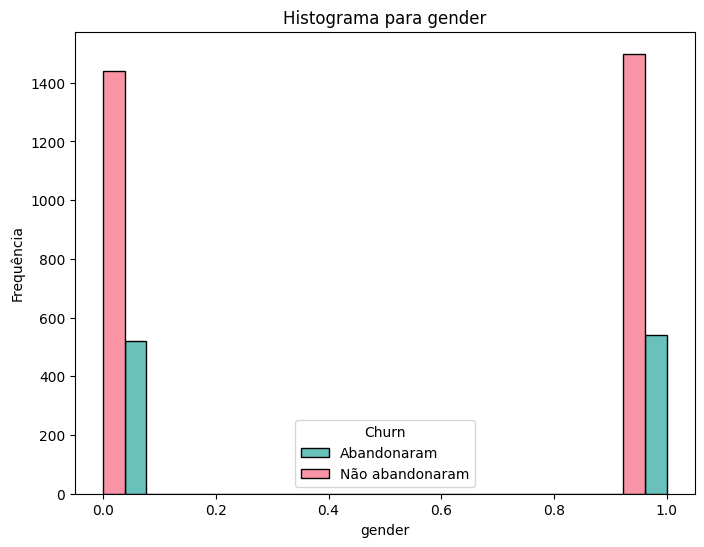

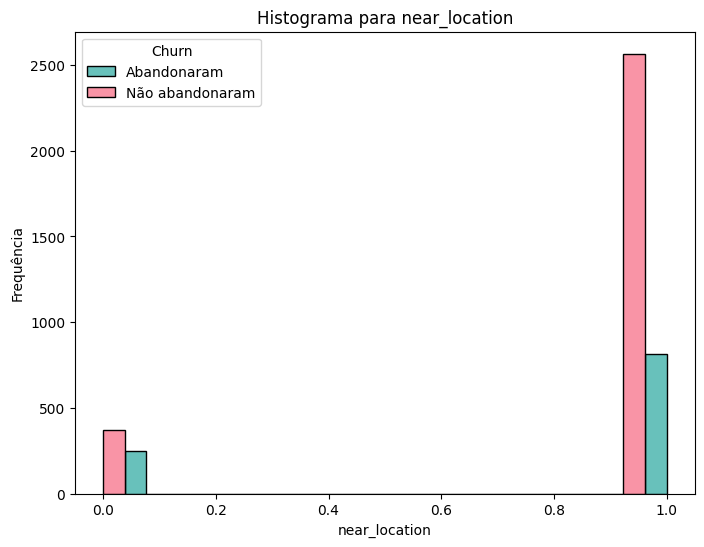

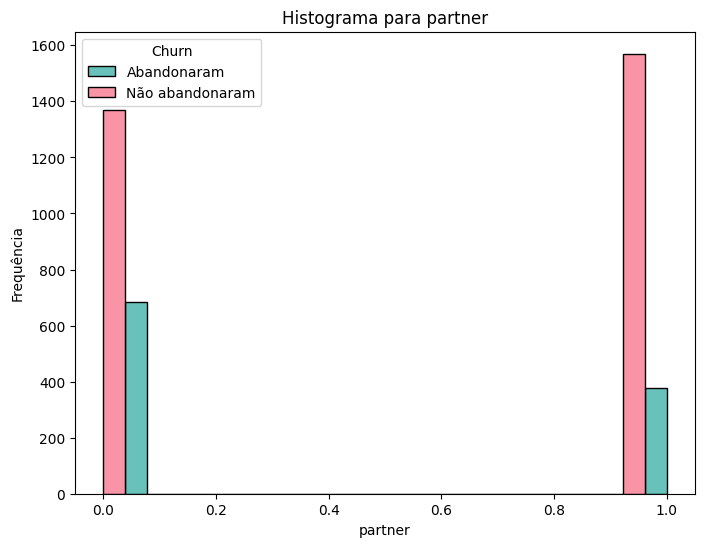

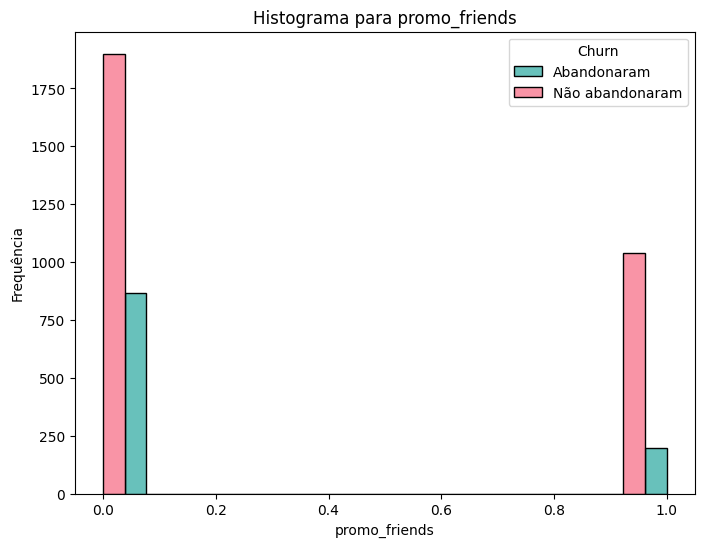

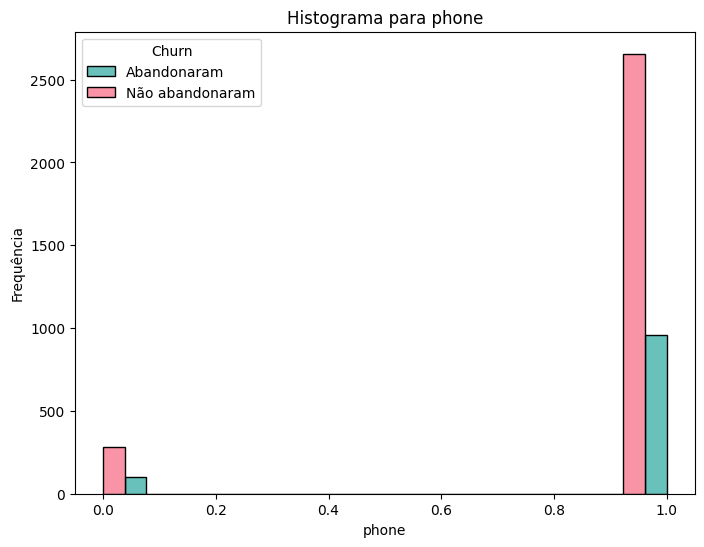

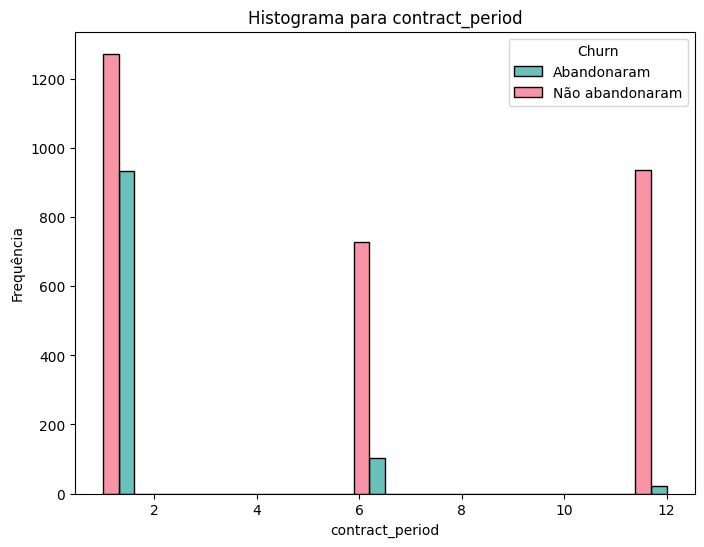

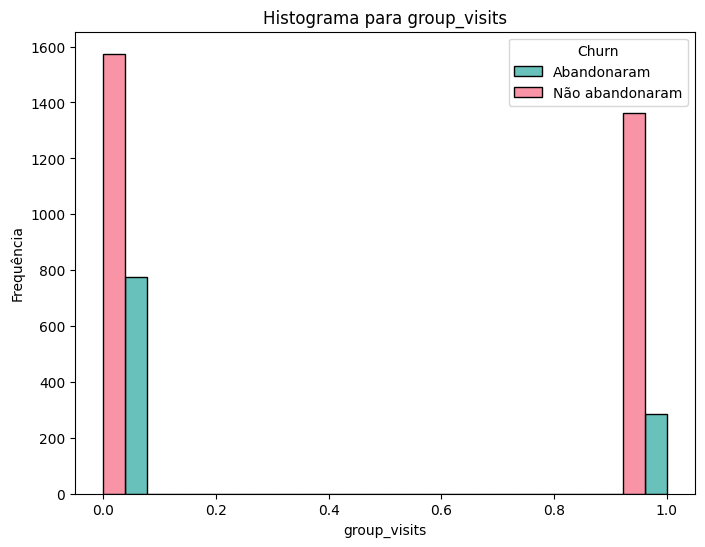

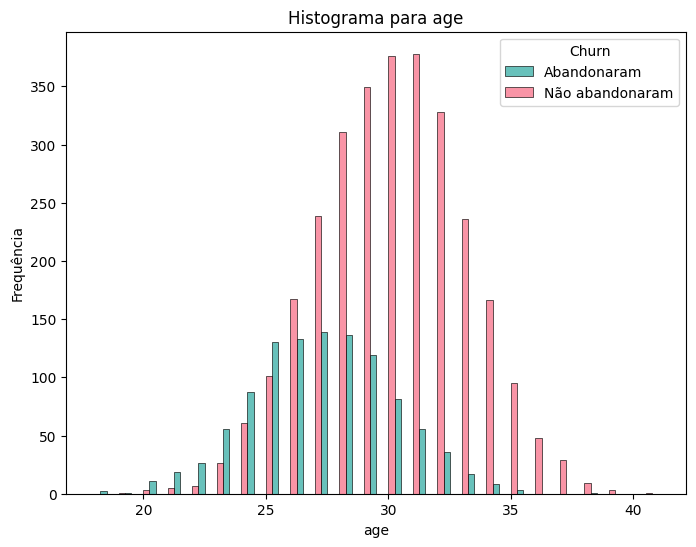

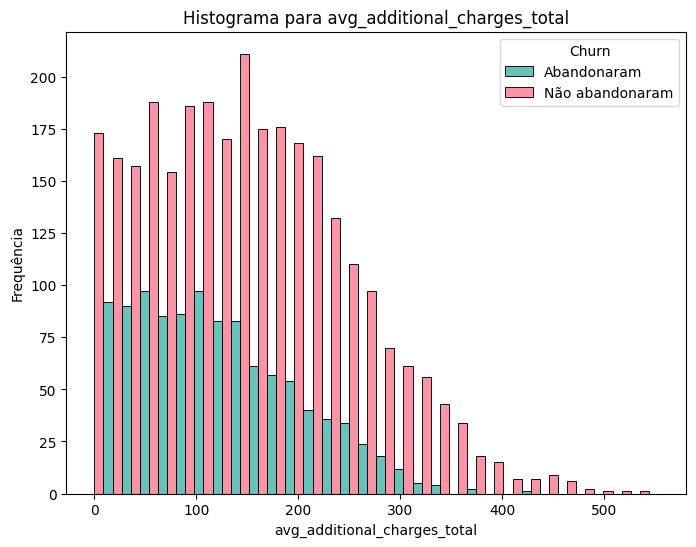

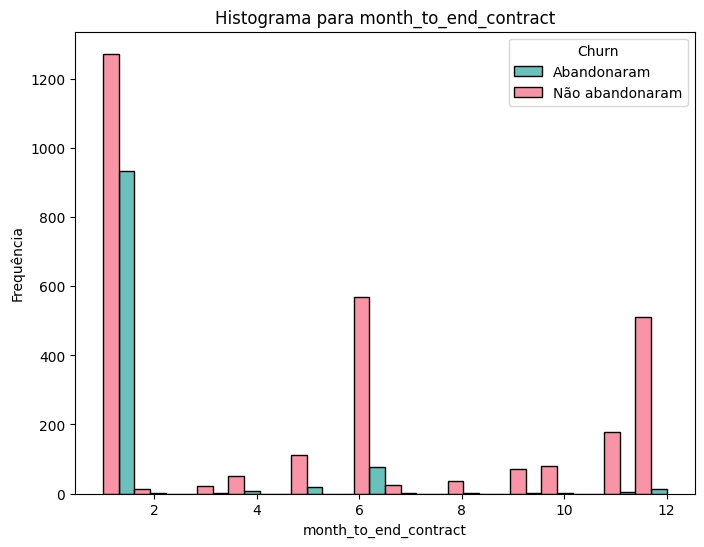

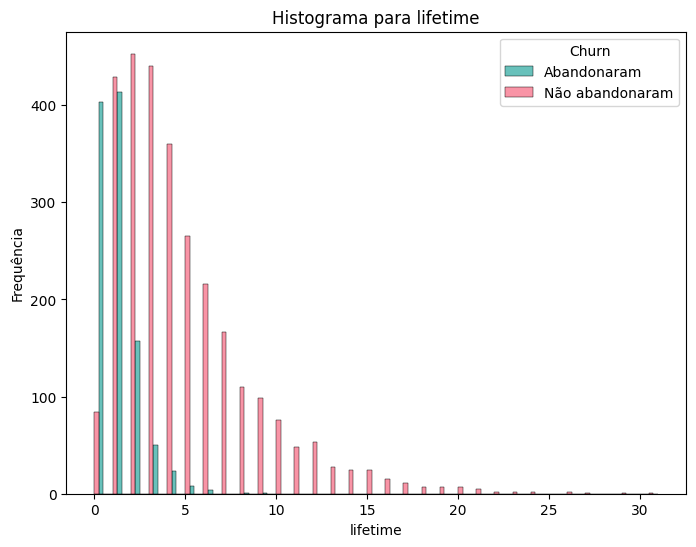

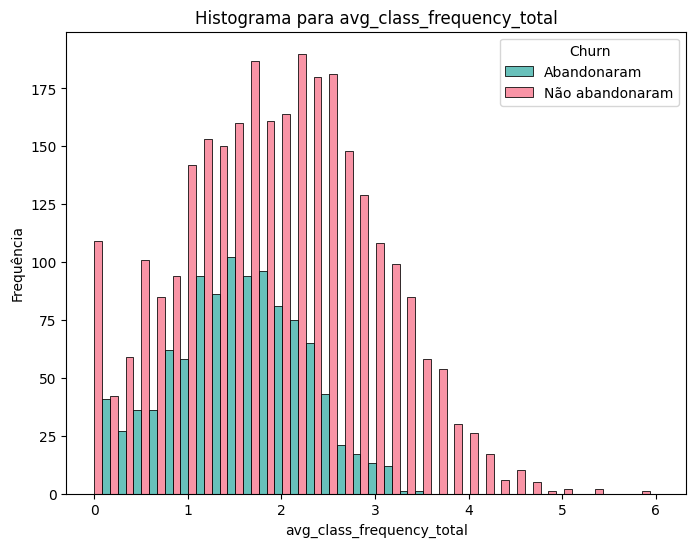

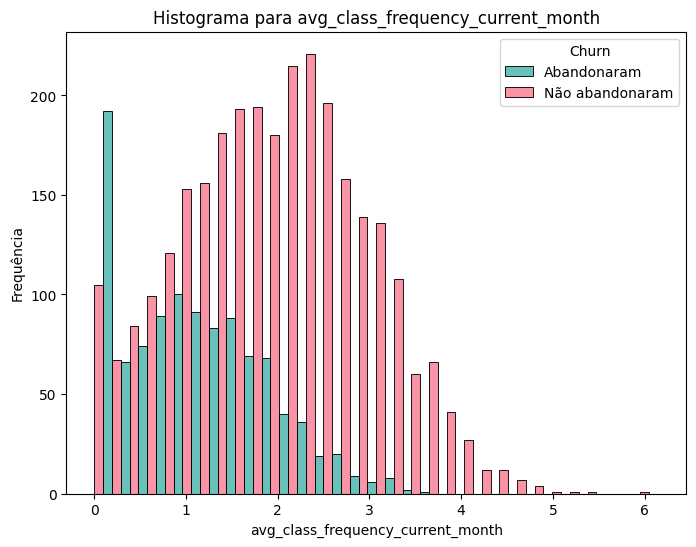

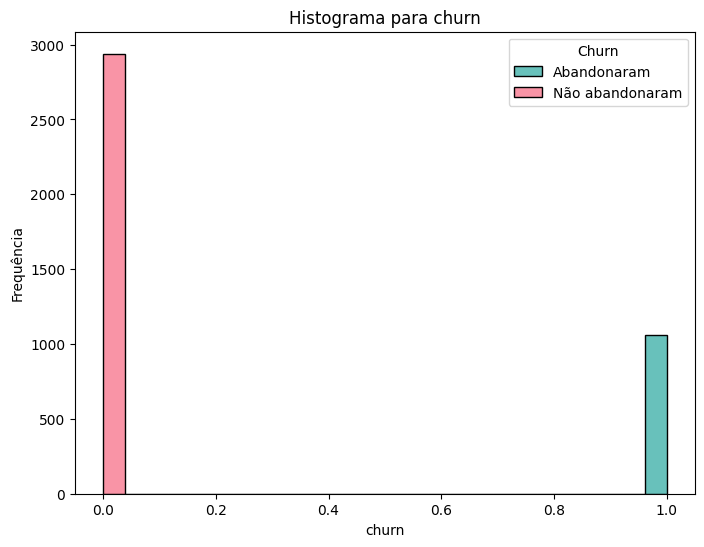

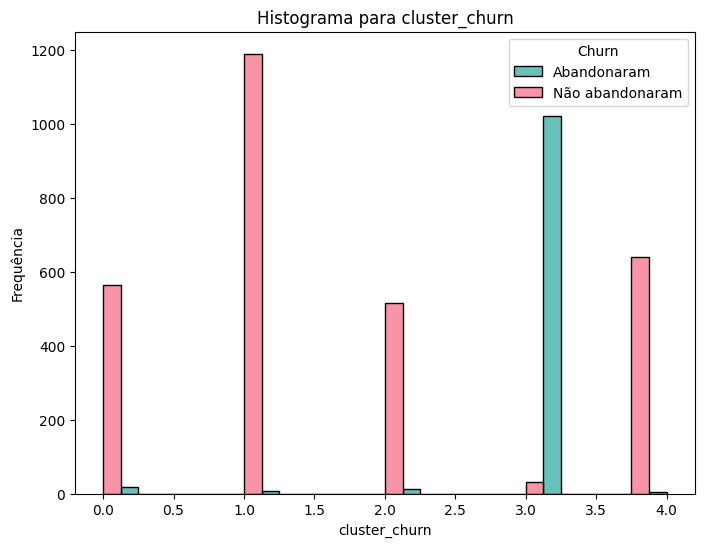

In [60]:
#construindo os histogramas - dados gerais 
for col in gym_churn.columns:
    # plotar os histogramas dos dados para 'abandonaram' vs 'não abandonaram' para cada uma das variáveis
    plt.figure(figsize=(8, 6))
    sns.histplot(data=gym_churn, x=col, hue='churn', palette='husl', multiple='dodge')
    plt.title('Histograma para {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.legend(title='Churn', labels=['Abandonaram', 'Não abandonaram'])
    plt.show()

- Conclusão

- Ao analisar os histogramas para cada uma das variáveis podemos observar alguns pontos e comparar com os describes anteriores
	- gender: os histogramas também mostram uma distribuição semelhante entre os gêneros e o total que abandonaram
	- near_location: independente da distancia a taxa de clientes que não abandonaram a academia é alta, sendo mais representativa para clientes que moram perto.
	- partner: alta frequência nos dados de não abandono da academia para ambos os casos, sendo que clientes que menos abandonaram fazem parte de algum pacote de parceria.
	- promo_friends: podemos observar que tem menos clientes que entraram com alguma promoção de indicação de amigos em comparação aos regulares  e que dos que entraram com alguma indicação, a taxa de abandono é baixa.
	- phone:Tanto para quem forneceu ou não forneceu o telefone, temos proporções semelhantes de abandono da academia, sendo que a maioria que forneceu não abandonou.
	- contract_period: semelhante ao observado em describe, quanto maior o período do contrato, menor a taxa de abandono da academia.
	- group_visits: Pessoas que participam em visitas de grupo tem menores chances de abandonar a academia do que os que não participam.
	- age: maiores taxas de abandono da academia são observadas em clientes com idade inferior a 25 anos. Após essa idade diminui significativamente a propo~ção de clientes que abandonam a academia
	- avg_aditional_charges_total: semelhante a analise de describe, clientes que abandonaram a academia gastam normalmente menos dinheiro em outros serviços que a academia oferece
	- month_to_end_contract: maior taxa de abandono da academia dos clientes que tem menos mêses até o final do contrato, sendo a maior concentração em 1 mês.
	- lifetime: clientes com maior tendência de abandono da academia frequentam ela por cerca de 2 meses
	- avg_class_frequency_total: a maioria dos clientes que abandona a academia realiza entre 1 e 2 visitas por semana
	- avg_class_frequency_current_month: a maioria dos clientes que abandona a academia vão de zero a 1,5 visitas em média por mês
	- 

### 2.2 - matriz de correlação  

#### 2.2.1 Não abandonaram

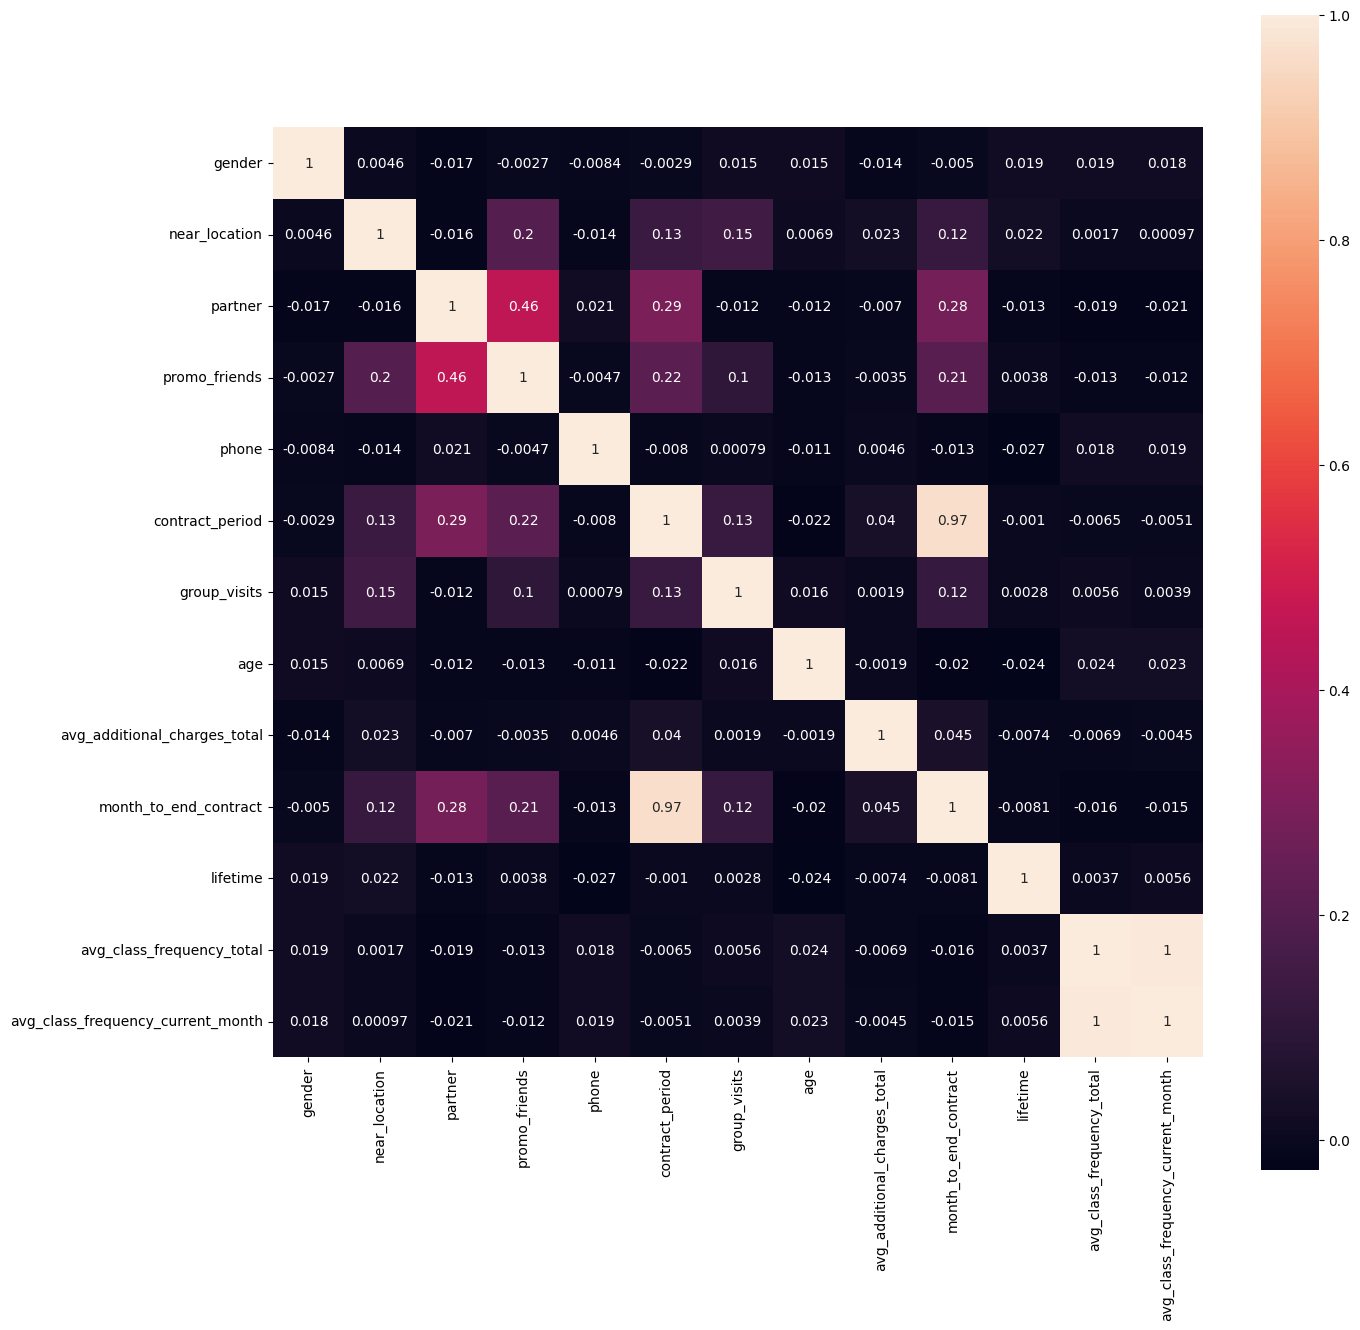

In [14]:
#construir e renderizar uma matriz de correlação para os clientes que não abandonaram
not_churned_cm = not_churned.corr()

#traçar um mapa de calor para a matriz de correlação para os clientes que não abandonaram
plt.figure(figsize=[15,15])
sns.heatmap(not_churned_cm, annot=True, square=True)

plt.show()

#### 2.2.2 Abandonaram

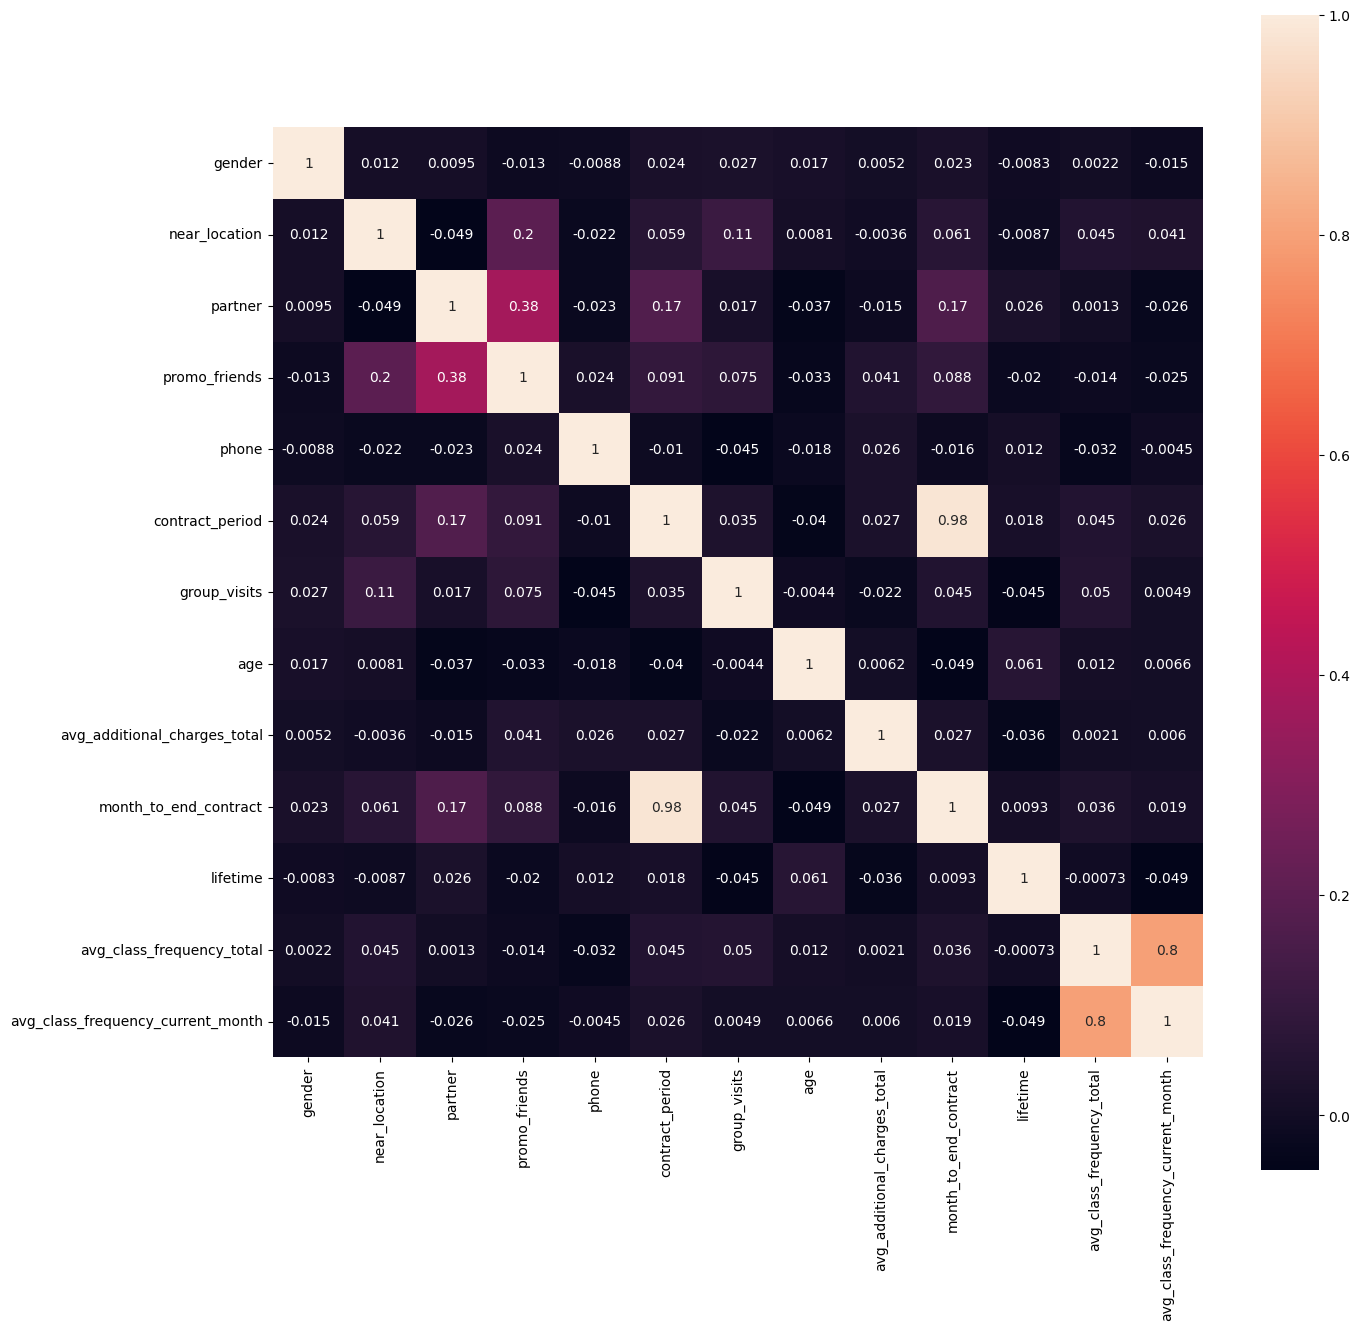

In [15]:
#construir e renderizar uma matriz de correlação para os clientes que abandonaram
churned_cm = churned.corr()

#traçar um mapa de calor para a matriz de correlação para os clientes que abandonaram
plt.figure(figsize=[15,15])
sns.heatmap(churned_cm, annot=True, square=True)

plt.show()

#### 2.2.3 Todos os dados

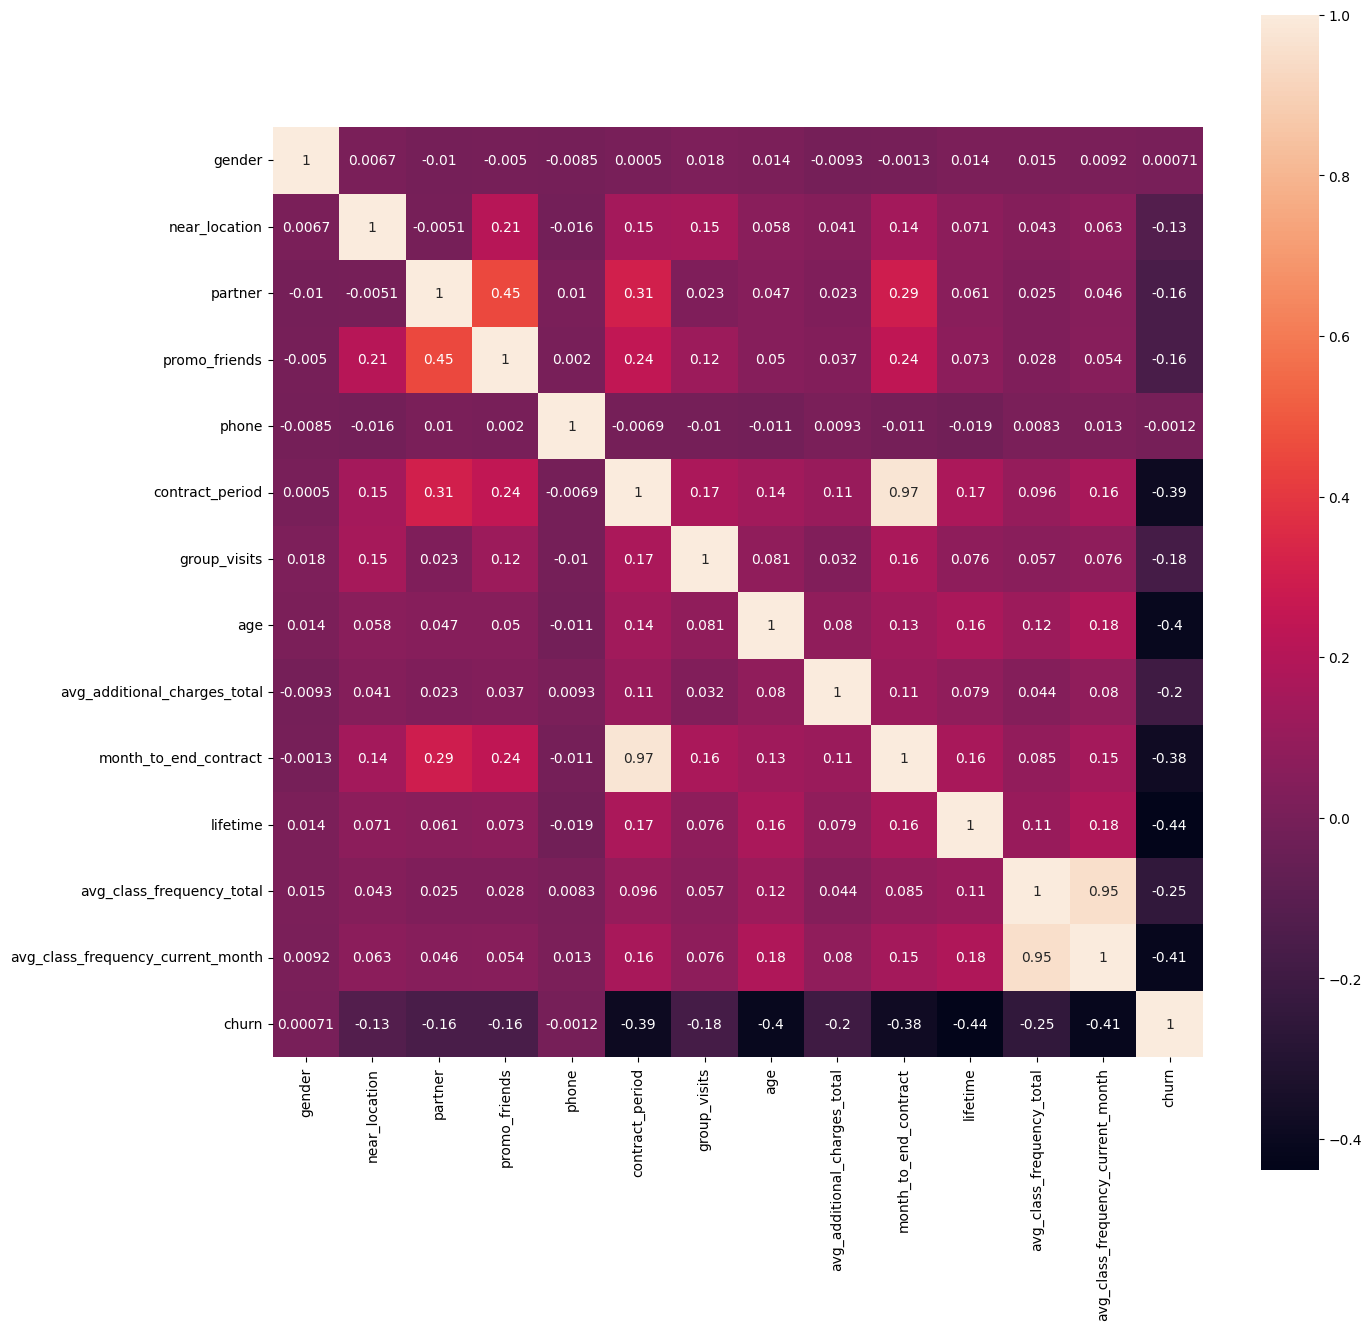

In [16]:
#construir e apresentar uma matriz de correlação para todos os dados
gym_churn_cm = gym_churn.corr()

#traçar um mapa de calor para a matriz de correlação de todos os dados
plt.figure(figsize=[15,15])
sns.heatmap(gym_churn_cm, annot=True, square=True)

plt.show()

### Step 2 - Conclusão
- Matrizes para os que 'abandonaram' e 'não abandonaram'
	- Quando observamos a matriz de correlação para os clientes que não abandonaram podemos observar correlações baixasmas com alguns destaques como:
		- correlação de 0,46 entre promo_friends e partner, sendo esta a melhor correlação postiva observada possivelmente pois além de ser com empresas parceiras esses alunos indicam os amigos para a academia
		- correlação de 0,29 entre partner e contract_period o que nos diz que alguns parceiros tendem a fazer contratos com períodos semelhantes
		- correlação de 0,28 para month_to_end_contract e partner, cuja justificativa é semelhante a anterior.
	- Com relação a matriz de correlação para os clientes que abandonaram a academia, os mesmos parâmetros dos que não abandonaram apresentaram as maiores taxas de correlação entretanto estas não foram taxas muito altas, sendo a maior taxa positiva de 0,38 para a correlação promo_friends e partner.
- Matriz geral de dados
	- Ao avaliar a matriz geral de dados, principalmente quanto a variável 'churn' podemos observar correlações fracas mas negativas com as variáveis avaliadas sendo elas:
		- Correlação de -0,44 entre churn e lifetime 
		- correlação de -0,41 entre churn e avg_class_frequency_current_month
		- correlação de -0,4 entre churn e age
		- correlação de -0,39 entre churn e contract_period 
	- Isso nos mostra que temos uma relação inversamente proporcional no abandono (churn) da academia com relação a estes dados, ou seja, quanto maiores os valores para estes dados (lifetime, avg_class_frequency_current_month, age e contract_period) menor será a taxa de churn, mas não necessáriamente chegará a zero pois, novamente a taxa de correlação foi baixa (em torno de -0,4).


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Tudo o que foi dito está correto, mas seria interessante entrar mais no detalhe (especialmente do segundo bullet) sobre o que isso significa na prática.
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Agradeço as pontuações realizadas acredito que eu consegui extrair uma informação melhor dos resultados obtidos com as matrizes.
</div>

## Step 3 - Construa um modelo para predizer a rotatividade de clientes

In [17]:
#dividindo o conjunto de dados

X = gym_churn.drop(columns=['churn'])
y = gym_churn['churn']

#Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [18]:
#treinar o StandardScaler com o conjunto de treino 

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [19]:
#transformar os conjuntos de treino e de teste

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho no uso do scaler de forma correta com os conjuntos de dados.
</div>


In [20]:
#definir a função para determinar a accuracy, precision, recall
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metric'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

### 3.1 treino do modelo com regressão logística

In [21]:
#definindo o modelo de regressão logistica

lr_model = LogisticRegression(random_state=0)

#treinando o modelo
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [22]:
#usando o modelo para fazer predições

lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

#mostrar as métricas
print_all_metrics(y_test, lr_predictions,lr_probabilities, title= 'Métricas para a regressão logística')

Métricas para a regressão logística
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


### 3.2 Treinar o modelo com random forest

In [23]:
#definir o modelo random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

#treinar o modelo
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

In [24]:
#usando o random forest para fazer predições
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

#mostrar todas as métricas

print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Metricas para random forest')

Metricas para random forest
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


### 3.3 Avaliando accuracy, precision and recall

- De acordo com os resultados obtidos a partir da regressão logística, obtivemos os seguintes resultados:
    - Accuracy: 0.92
	- Precision: 0.85
	- Recall: 0.83

- Quanto às previsões da random forest, obtivemos os seguintes resultados::
    - Accuracy: 0.92
	- Precision: 0.84
	- Recall: 0.81

- Isto significa que a regressão logística obteve melhores resultados do que o modelo de random forest para validar os dados.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho na etapa de modelagem e avaliação dos resultados.
</div>


## Step 4 - Crie agrupamentos de clientes

In [25]:
#criando um objeto StandardScaler object e aplicando isso ao conjunto de treino
sc = StandardScaler()

#treinar o scaler e transformar a matriz para um conjunto de treino
X_train_st = sc.fit_transform(X_train)

linked = linkage(X_train_st, method='ward')

#### 4.1 Dendrograma

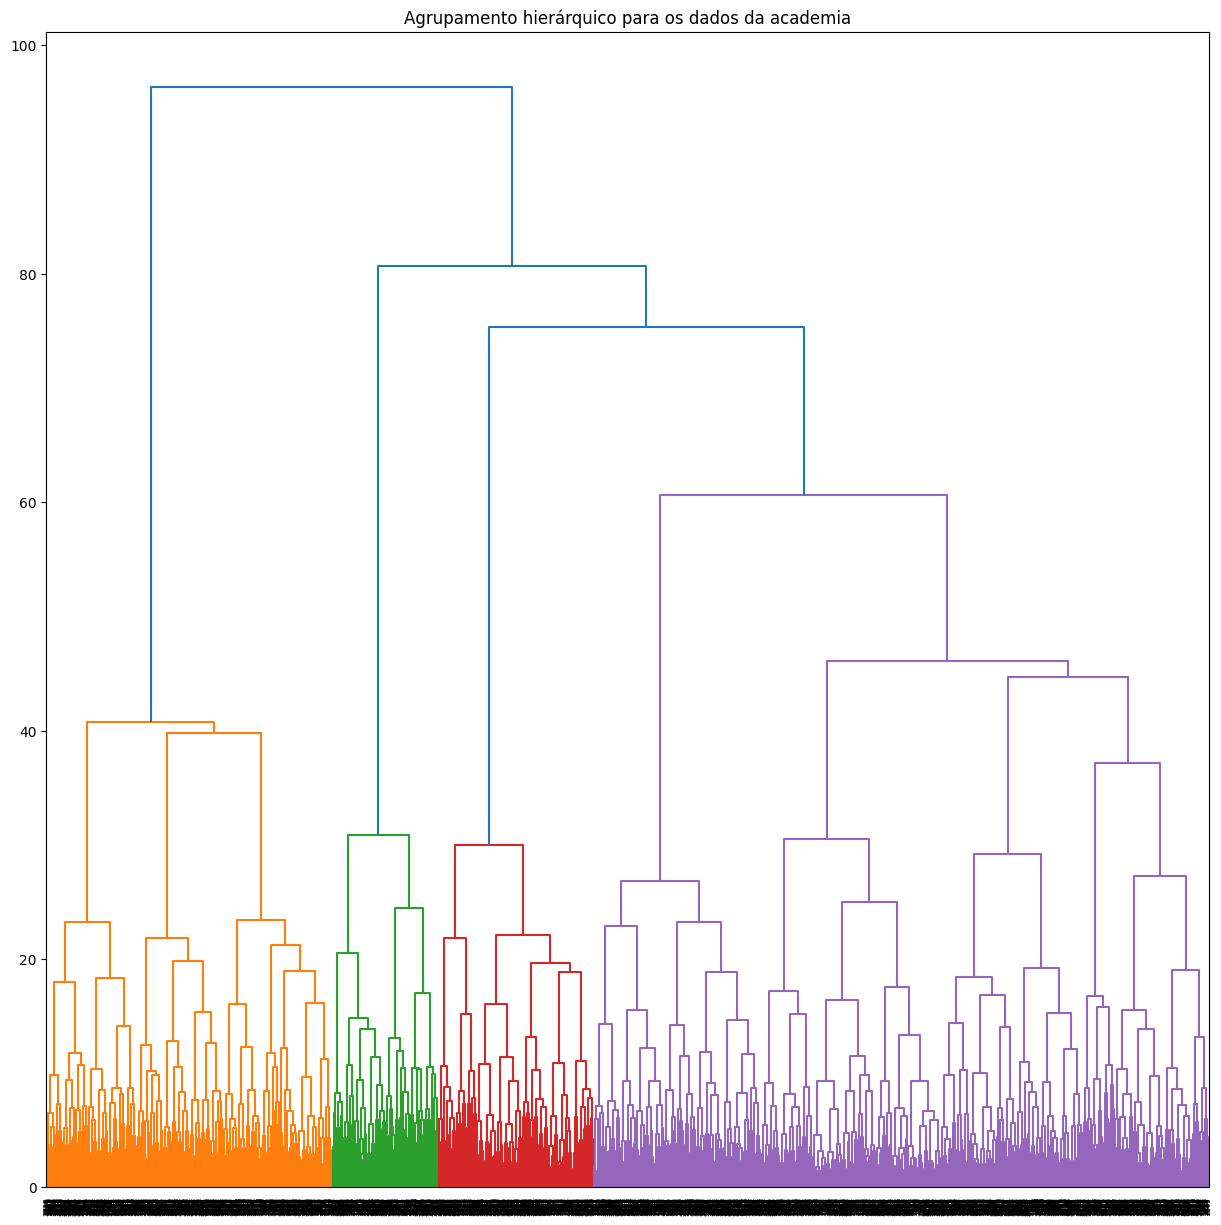

In [26]:
#plotando o dendrograma

plt.figure(figsize=[15,15])
dendrogram(linked, orientation='top')
plt.title('Agrupamento hierárquico para os dados da academia')
plt.show()

- Com base nas 5 cores do dendrograma, vou utilizar um modelo com 5 clusters nos passos seguintes.

#### 4.2 Treinar o grupo com K-means

In [27]:
#definir a função para apresentar gráficos de características emparelhadas para agrupamentos
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=[10,10])
    sns.scatterplot(x=x_name, y=y_name, hue=cluster_name, data=df, palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [28]:
#padronizando os dados
sc = StandardScaler()
X_sc = sc.fit_transform(gym_churn)

In [29]:
#definição do modelo k-means com 5 clusters
km = KMeans(n_clusters = 5)

#prever os clusters para as observações
labels = km.fit_predict(X_sc)

In [30]:
#armazenar as etiquetas de agrupamento no nosso DataFrame
gym_churn['cluster_churn'] = labels

In [31]:
#obtenção das estatísticas dos valores médios das características por agrupamento
gym_churn.groupby(['cluster_churn']).mean() 

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_churn,,,,,,,,,,,,,,
0,0.519793,0.913941,0.705680,0.407917,0.879518,9.998279,0.549053,29.738382,165.892003,9.246127,4.261618,0.923830,0.914955,0.029260
1,0.524207,0.793823,0.244574,0.002504,0.904841,2.065109,0.390651,30.166945,156.708720,1.969950,4.776294,2.136160,2.139617,0.006678
2,0.502846,0.952562,0.793169,1.000000,0.891841,3.123340,0.472486,30.055028,151.253573,2.851992,4.711575,2.099672,2.094423,0.022770
3,0.511429,0.761905,0.341905,0.168571,0.906667,1.508571,0.256190,26.893333,113.529996,1.460000,1.015238,1.427221,1.007114,0.971429
4,0.479814,0.927019,0.725155,0.450311,0.927019,11.198758,0.534161,29.878882,162.635841,10.128882,4.894410,2.818486,2.813862,0.006211


- Os clientes dos clusters 2, 3 e 4 são os que têm menos hipóteses de abandonar o sistema em comparação com o cluster 2. Também podemos ver que os clientes do cluster 0 estão a sair lentamente, pelo que temos de verificar o que se passa.

- Os principais pontos que podemos observar no cluster 2 (churn de 0,9987) são: ter um período de contrato mais curto, ter uma baixa participação em visitas de grupo, ter em média 26 anos de idade, gastar o menor montante em despesas adicionais médias, ter poucos meses até ao fim do contrato (cerca de 1,56 meses). O tempo de vida é curto e têm a menor avg_class_frequency no mês atual.

- Quando pensamos no cluster 0 (churn de 0,4693), alguns pontos merecem atenção:
    - a maioria não assinou porque um amigo indicou
    - têm uma baixa participação nas visitas de grupo
    - o seu tempo de vida é o segundo mais pequeno em comparação com o grupo 2

In [32]:
print(gym_churn.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn', 'cluster_churn'],
      dtype='object')


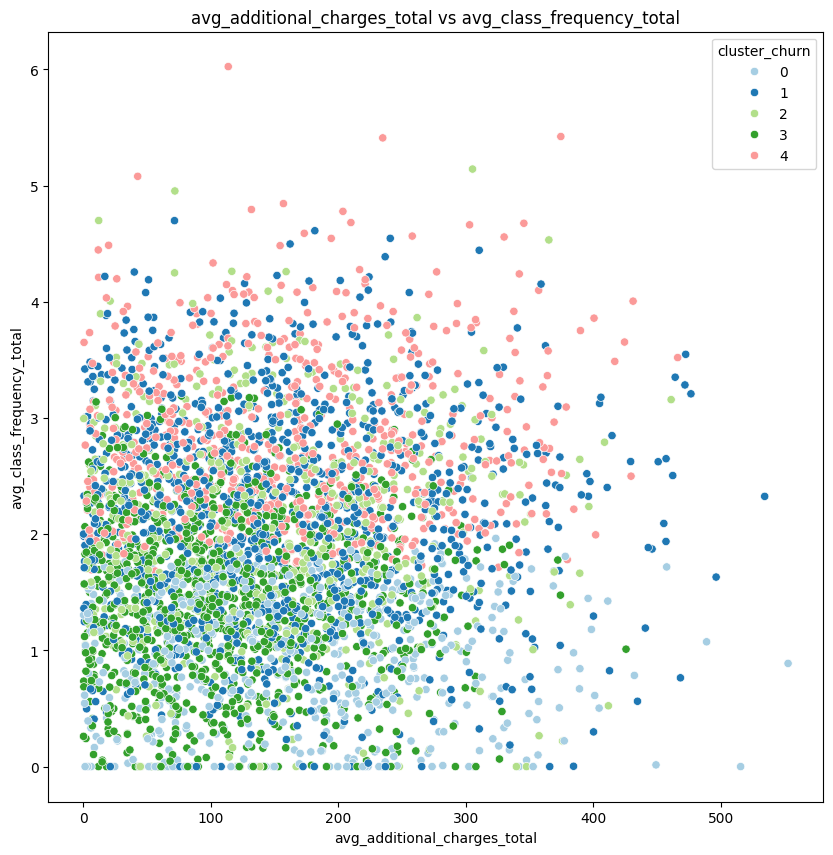

In [33]:
#renderizar o gráfico para as características emparelhadas
show_clusters_on_plot(gym_churn,'avg_additional_charges_total','avg_class_frequency_total','cluster_churn')

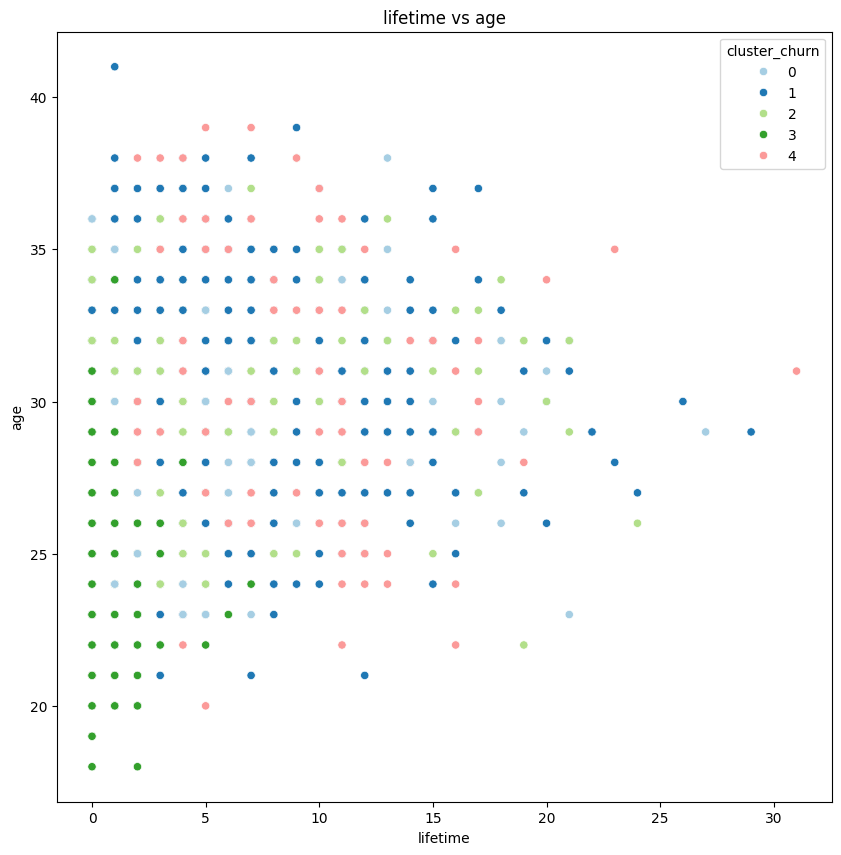

In [34]:
#renderizar o gráfico para as características emparelhadas
show_clusters_on_plot(gym_churn,'lifetime','age','cluster_churn')

<Figure size 2000x2000 with 0 Axes>

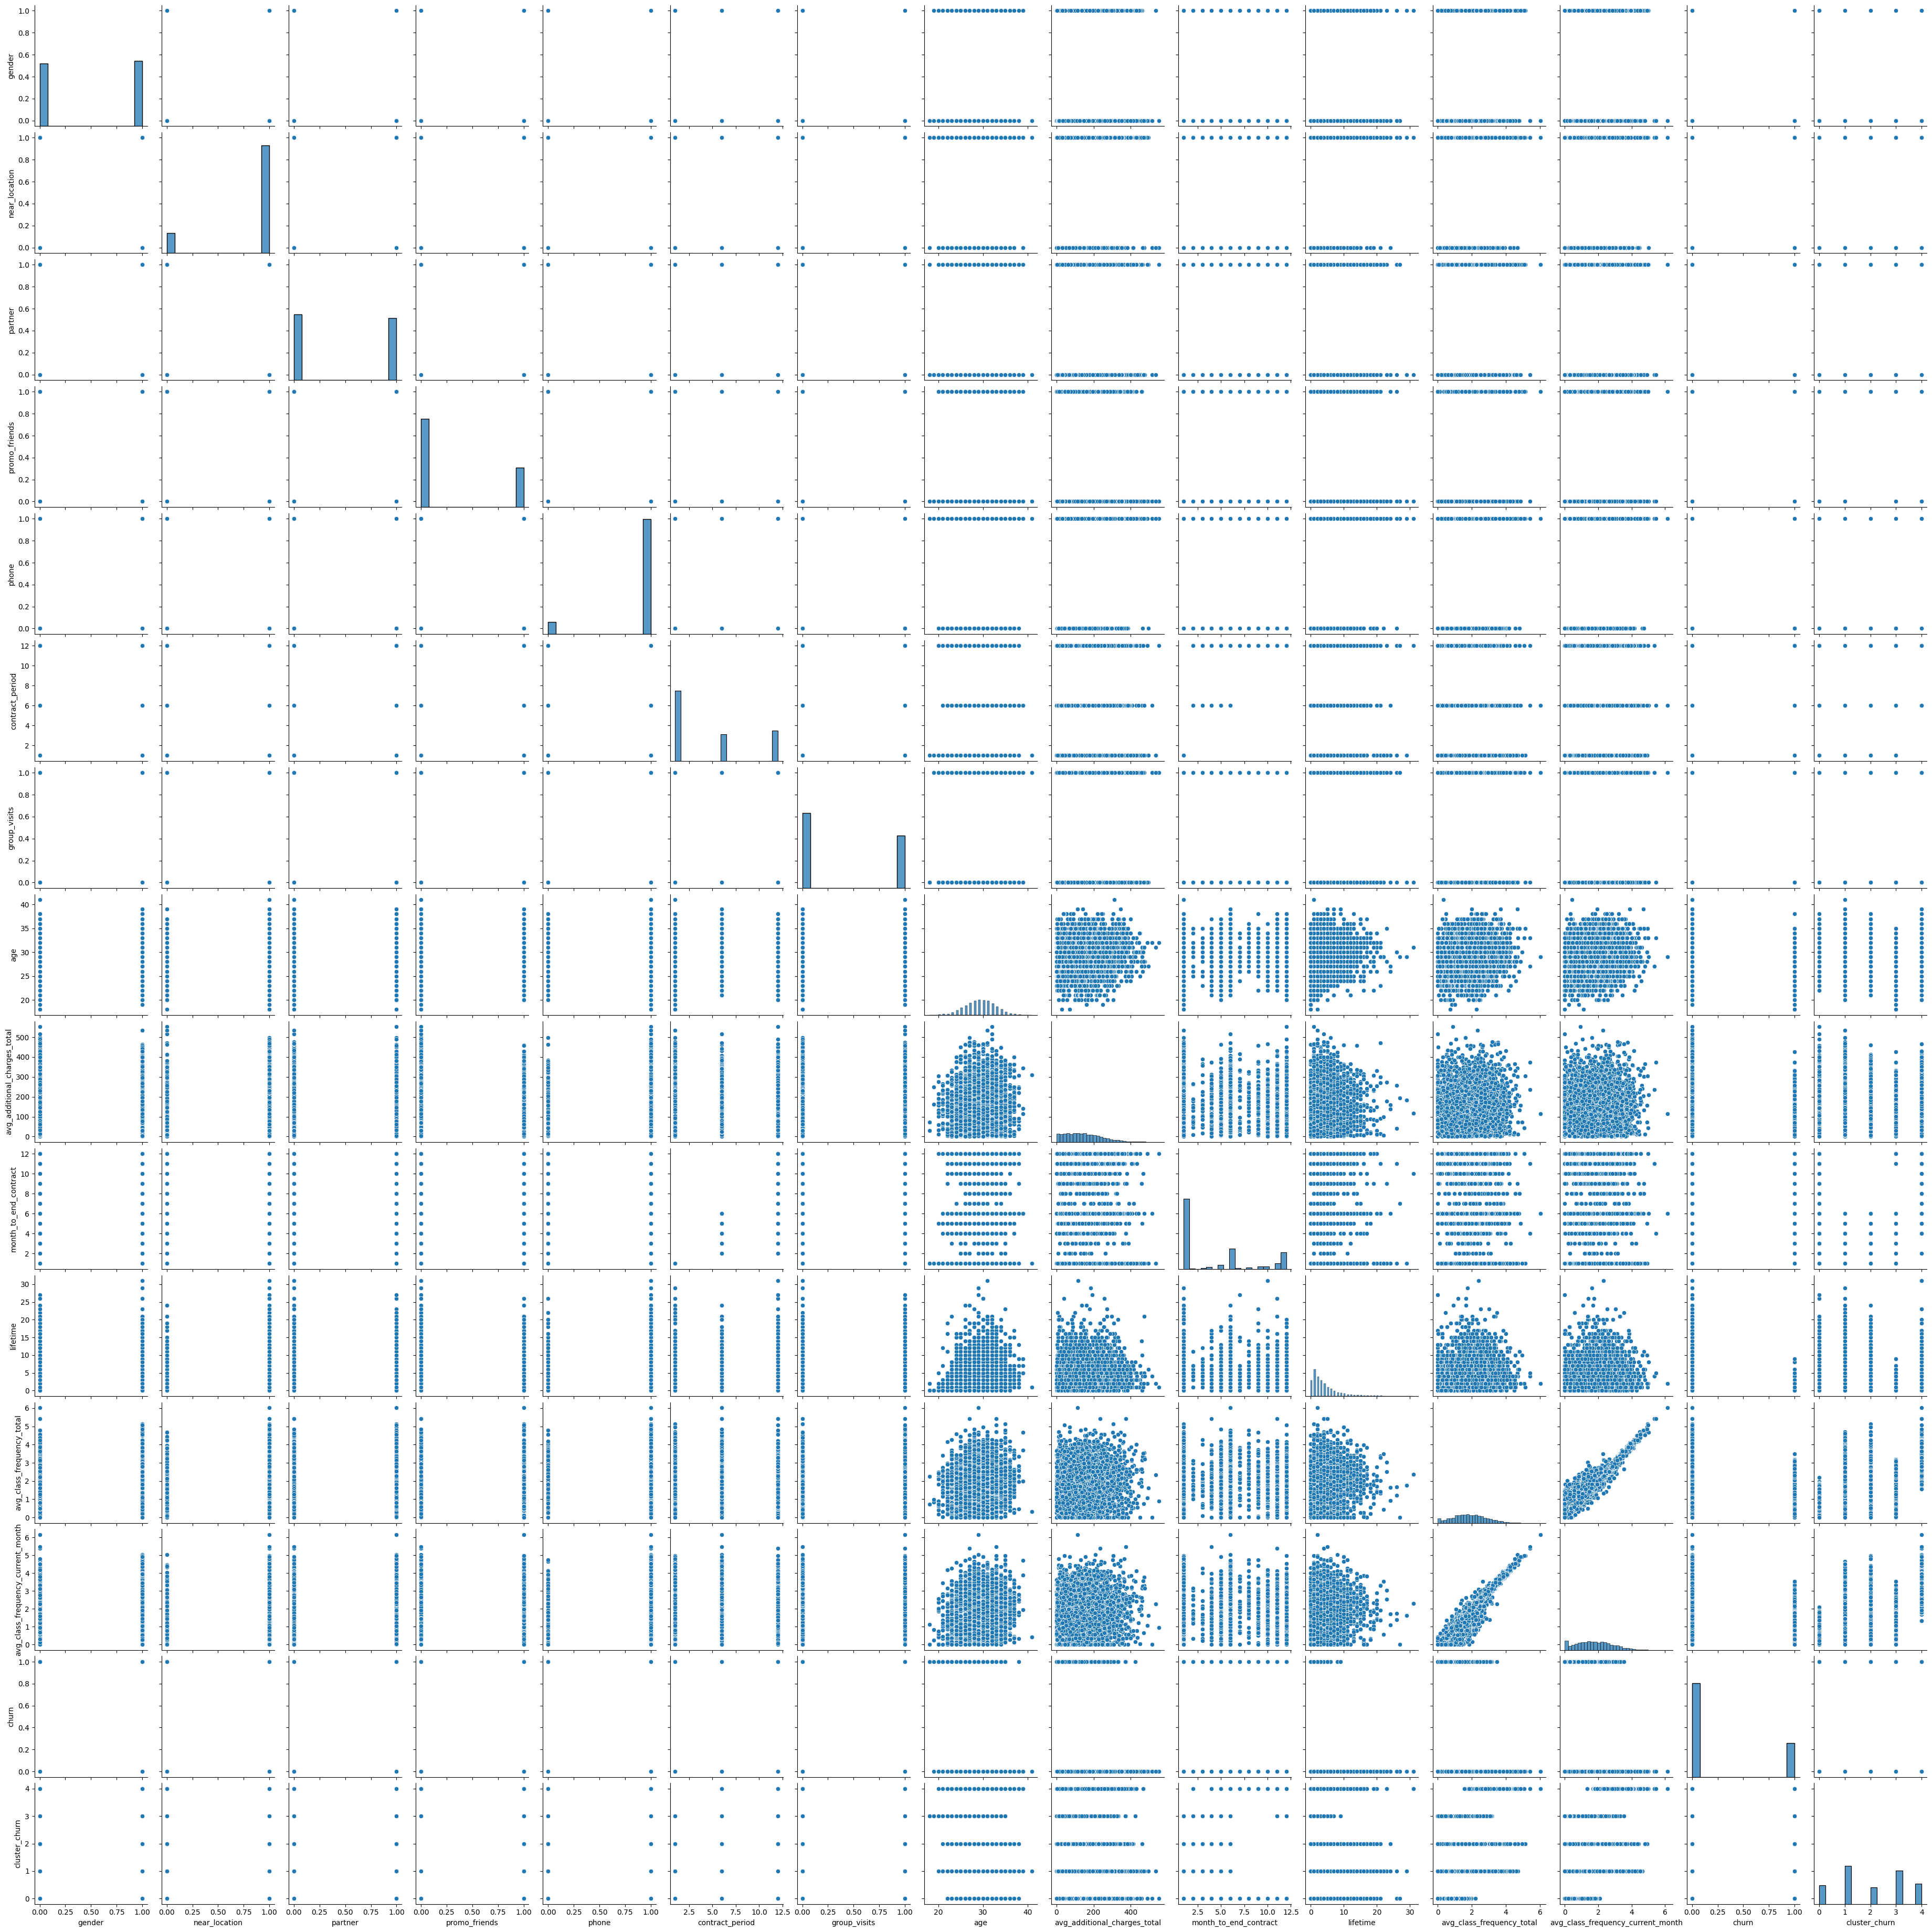

In [35]:
#construir um gráfico pairplot para ver todos os resultados

plt.figure(figsize=[20,20])
sns.pairplot(gym_churn)
plt.show()

- Conclusão
    - Considerando os gráficos de dispersão dos clusters, é difícil ver uma relação entre os grupos e as variáveis coletadas pela academia para determinar quais clientes irão abandonar o serviço.
    - Por outro lado, ao avaliar as médias obtidas é possível observar alguns padrões nos grupos que são altamente susceptíveis ao abandono.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Todo o processo de clusterização e análises posteriores foi realizado conforme o esperado!
</div>


## Step 5 - Chegue a conclusões e faça recomendações básicas sobre trabalhar com clientes

### Conclusão

- Com base nos dados obtidos, podem ser observados alguns padrões entre os clientes que abandonam e os que não abandonam a academia:
    - Os clientes que abandonam a academia:
        - tendem a viver mais longe, 
        - não aderiram com base numa promoção de recomendação de um amigo, 
        - têm contratos de ginásio mais curtos, 
        - gastaram menos dinheiro em outros produtos do ginásio e, 
        - geralmente, têm menos meses restantes nos seus contratos.

- Sugestões
    - Uma vez que a grande maioria fornece os seus números de telefone, seria interessante contactá-los ou enviar promoções a estes clientes.
    - Outra alternativa seria a de contactar empresas parceiras e oferecer alguns descontos para os seus funcionários aderirem a grupos para participação na academia.
    - Seria vantajoso trabalhar com estes clientes à medida que se aproxima o fim dos seus contratos para os incentivar a continuar a frequentar o ginásio.


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho com as conclusões.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Muito obrigado pelo tempo tomado para corrigir meu projeto. Acatei as sujestões e isso trouxe uma melhor visibilidade para os resultados obtidos com a análise.
</div>